In [ ]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)


In [ ]:
#make dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"x1":X[:,0],
                 "x2":X[:,1],
                 "y":y})
circles.head(10)

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


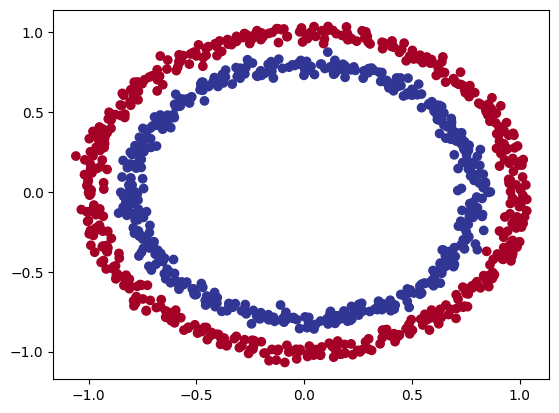

In [ ]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.legend
plt.show()

In [ ]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
#another method
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(42)
model0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)
model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
#build a model
import torch
from torch import nn
from sklearn import datasets
class circle_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2,out_features=5)
        self.layer2=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer2(self.layer1(x))
model0=circle_model()
model0



circle_model(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('layer1.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('layer2.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('layer2.bias', tensor([-0.1213]))])

In [ ]:
#make predictions
with torch.inference_mode():
    untrained_preds=model0(X_test)
print(f"length of predictions:{len(untrained_preds)},shape:{len(untrained_preds.shape)}")
print(f"lenght of test samples:{len(X_test)},shape:{X_test.shape}")
print(f"\nfirst 10 predictions:\n{untrained_preds[:10]}")
print(f"first 10 labels:\n{y_test[:10]}")

length of predictions:200,shape:2
lenght of test samples:200,shape:torch.Size([200, 2])

first 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
first 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
#set up the loss function
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)


In [ ]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))
    return acc

In [ ]:
#training and testing loop
epochs=10
for epoch in range(epochs):
    #training mode on
    model0.train()
    #forward pass
    y_logit=model0(X_train).squeeze()#to reduce dimensions
    y_pred=torch.round(torch.sigmoid(y_logit))
    #loss BCEWithLogitLoss
    loss=loss_fn(y_logit,y_train)
    print(loss)
    accuracy=accuracy_fn(y_train,y_pred)
    #print(f"train accuracy:{accuracy}")
    #zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #gradient descent
    optimizer.step()
    ### Testing
    model0.eval()
    with torch.inference_mode():
        #forward pass
        test_logit=model0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logit))
        test_acc=accuracy_fn(y_test,test_pred)
        #print(f"test accuracy:{test_acc}")
        print(test_acc*100)

tensor(0.6980, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
57.99999999999999
tensor(0.6977, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
57.49999999999999
tensor(0.6974, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
56.49999999999999
tensor(0.6972, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
56.49999999999999
tensor(0.6969, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
56.00000000000001
tensor(0.6967, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
56.00000000000001
tensor(0.6965, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
56.49999999999999
tensor(0.6964, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
56.49999999999999
tensor(0.6962, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
55.00000000000001
tensor(0.6960, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
54.0


In [ ]:
#visualize visualize visualize
import requests
from pathlib import Path
#download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
    print("helper fucntions.py already exists,skipping download")
else:
    print("downloading helper_functions.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions,plot_decision_boundary


downloading helper_functions.py


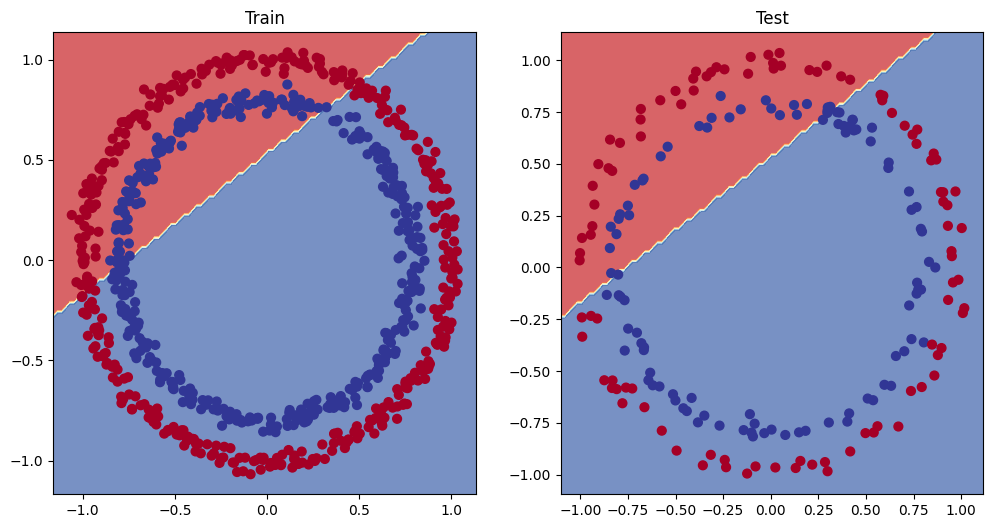

In [ ]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model0,X_test,y_test)


In [ ]:
#increase the model accuracy and reduce loss by change the following
#add 5 more neurons
# 1.adding one more layer
#2.change number of epochs 10->100

In [ ]:
class circle_model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))


In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model1=circle_model1()
model1

circle_model1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732],
                      [-0.5424,  0.5802],
                      [ 0.2037,  0.2929],
                      [ 0.2236, -0.0123],
                      [ 0.5534, -0.5024],
                      [ 0.0445, -0.4826]])),
             ('layer1.bias',
              tensor([ 0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217, -0.4217,
                       0.6360,  0.2356])),
             ('layer2.weight',
              tensor([[ 0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,  0.2628,
                       -0.1633, -0.2156],
                      [ 0.1678, -0.1278,  0.1919, -0.0750,  0.1809, -0.2457, -0.1596,  0.0964,
                        0.0669, -0.0806],
                      [ 0.1885,  0.2150, -0.2293, -0.1688,  0.2896, -0.1067

In [ ]:
#set up loss and optimizer for model1
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)


In [ ]:
#training model
#forward pass
epochs=10
torch.manual_seed(42)
for epoch in range(epochs):
  model1.train()
  y_logit=model1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logit))
  loss_train=loss_fn(y_logit,y_train)
  print(f"training loss:{loss_train}")
  accuracy_train=accuracy_fn(y_train,y_pred)
  print(f"train accacy:{accuracy_train}")
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()
  with torch.inference_mode():
    model1.eval()
    test_logit=model1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logit))
    loss_test=loss_fn(test_logit,y_test)
    accuracy_test=accuracy_fn(y_test,test_pred)
    print(f"test loss:{loss_test}")
    print(f"test accuracy:{accuracy_test}")




training loss:0.6971261501312256
train accacy:0.5
test loss:0.695935845375061
test accuracy:0.5
training loss:0.6967922449111938
train accacy:0.5
test loss:0.6956765651702881
test accuracy:0.5
training loss:0.6964898109436035
train accacy:0.5
test loss:0.6954432129859924
test accuracy:0.5
training loss:0.6962159872055054
train accacy:0.5
test loss:0.695233166217804
test accuracy:0.5
training loss:0.6959679126739502
train accacy:0.5
test loss:0.6950441002845764
test accuracy:0.5
training loss:0.695743203163147
train accacy:0.5
test loss:0.6948738098144531
test accuracy:0.5
training loss:0.6955395340919495
train accacy:0.5
test loss:0.6947207450866699
test accuracy:0.5
training loss:0.6953548192977905
train accacy:0.5
test loss:0.6945828795433044
test accuracy:0.5
training loss:0.6951874494552612
train accacy:0.5
test loss:0.6944589018821716
test accuracy:0.5
training loss:0.6950355768203735
train accacy:0.5
test loss:0.6943473815917969
test accuracy:0.5


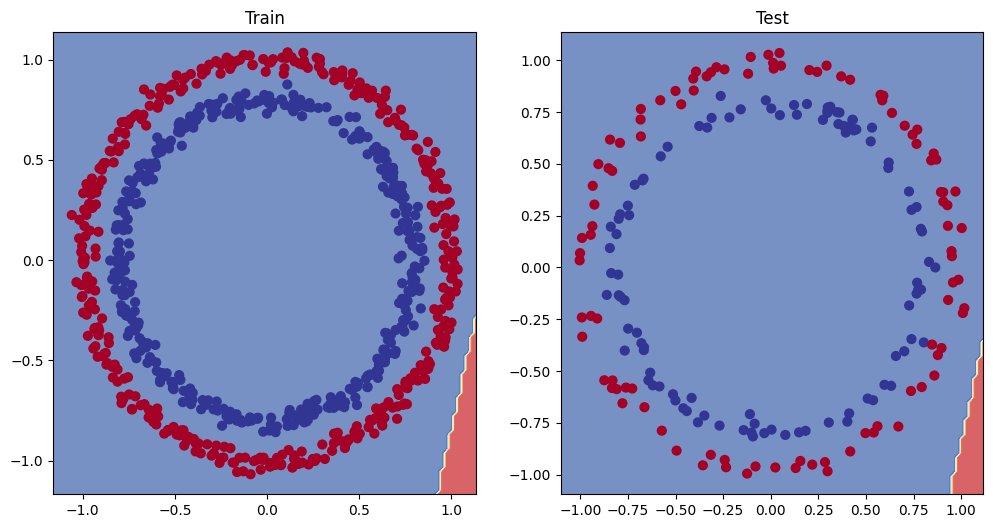

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1,X_test,y_test)
plt.show()

In [ ]:
#creating a straigt line dataset
weight=0.7
bias=0.3
start=0
end=1
step=0.01
xr=torch.arange(start,end,step).unsqueeze(dim=1)
yr=weight*xr+bias
xr[:10],yr[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
split=int(0.8*len(xr))
X_train,y_train=xr[:split],yr[:split]
X_test,y_test=xr[split:],yr[split:]


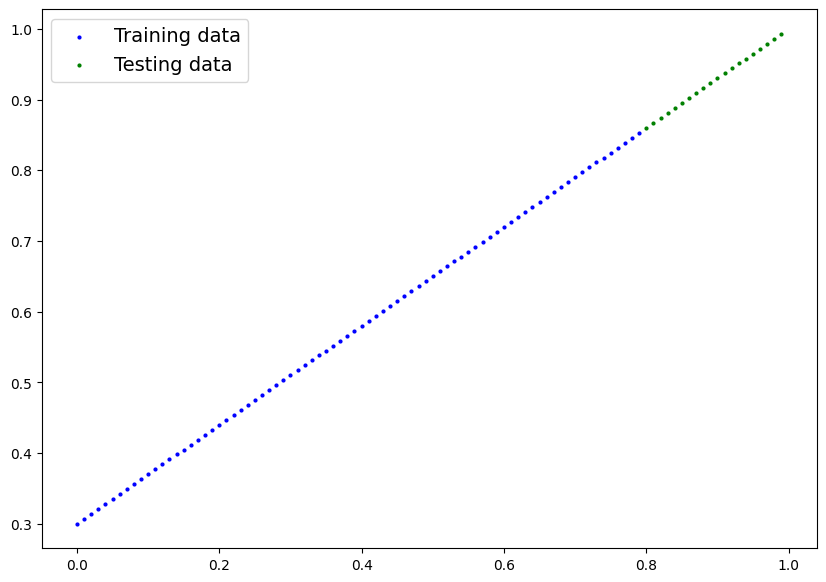

In [ ]:
plot_predictions(train_data=X_train,train_labels=y_train,
                 test_data=X_test,test_labels=y_test)

In [ ]:
#build a model by neural nework model2
circle_model2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)


)
circle_model2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#set up loss function
loss=nn.L1Loss()
optimizer=torch.optim.SGD(params=circle_model2.parameters(),lr=0.01)


In [ ]:
torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
  circle_model2.train()
  y_pred=circle_model2(X_train)
  loss_train=loss(y_pred,y_train)
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()
  circle_model2.eval()
  with torch.inference_mode():
    y_pred=circle_model2(X_test)
    loss_test=loss(y_pred,y_test)
  if epoch%100==0:
    print(f"epoch:{epoch} loss_train:{loss_train} loss_test:{loss_test}")

epoch:0 loss_train:0.7598584890365601 loss_test:0.9110288619995117
epoch:100 loss_train:0.02857953868806362 loss_test:0.0008127152686938643
epoch:200 loss_train:0.025325417518615723 loss_test:0.002092066453769803
epoch:300 loss_train:0.021374788135290146 loss_test:0.0030509470961987972
epoch:400 loss_train:0.019644945859909058 loss_test:0.003407782409340143
epoch:500 loss_train:0.019402235746383667 loss_test:0.0038725673221051693
epoch:600 loss_train:0.019032442942261696 loss_test:0.003789058420807123
epoch:700 loss_train:0.01878291741013527 loss_test:0.003813347313553095
epoch:800 loss_train:0.01839740015566349 loss_test:0.0032872825395315886
epoch:900 loss_train:0.017980266362428665 loss_test:0.00360372057184577


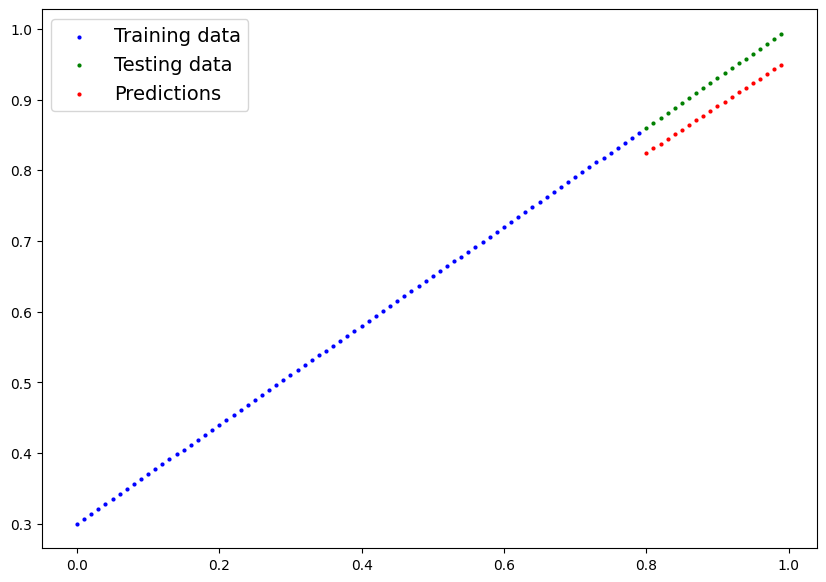

In [ ]:
circle_model2.eval()
with torch.inference_mode():
  y_pred=circle_model2(X_test)
  plot_predictions(train_data=X_train,train_labels=y_train,
                   test_data=X_test,test_labels=y_test,
                   predictions=y_pred)

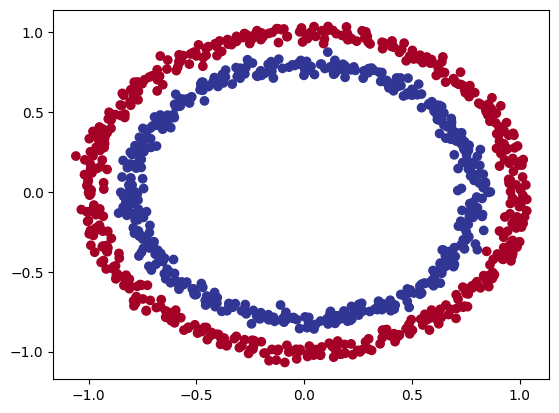

In [ ]:
#recreating non-linear data(red and blue labels)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
#convert data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [ ]:
from torch import nn
class circle_model3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()#non_linear activation funtion

  def forward(self):
    return self.layer_3(self.relu(self.layer2(self.relu(self.layer1))))

model3=circle_model3()
model3

circle_model3(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#build a model with non_linear functions
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model3=nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=1)

)
model3

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#set up and loss optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model3.parameters(),lr=0.1)


In [ ]:
#training a model with non_linearity
torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
  model3.train()
  y_logit=model3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logit))
  loss=loss_fn(y_logit,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100==0:
    print(f"loss:{loss} and acc:{acc*100}")


loss:0.6729821562767029 and acc:59.62499999999999
loss:0.6666046380996704 and acc:61.12499999999999
loss:0.6559025645256042 and acc:64.25
loss:0.6390031576156616 and acc:67.5
loss:0.6073774099349976 and acc:74.0
loss:0.5476517677307129 and acc:90.0
loss:0.44890475273132324 and acc:96.75
loss:0.32488590478897095 and acc:99.0
loss:0.21187201142311096 and acc:99.875
loss:0.15659905970096588 and acc:99.75


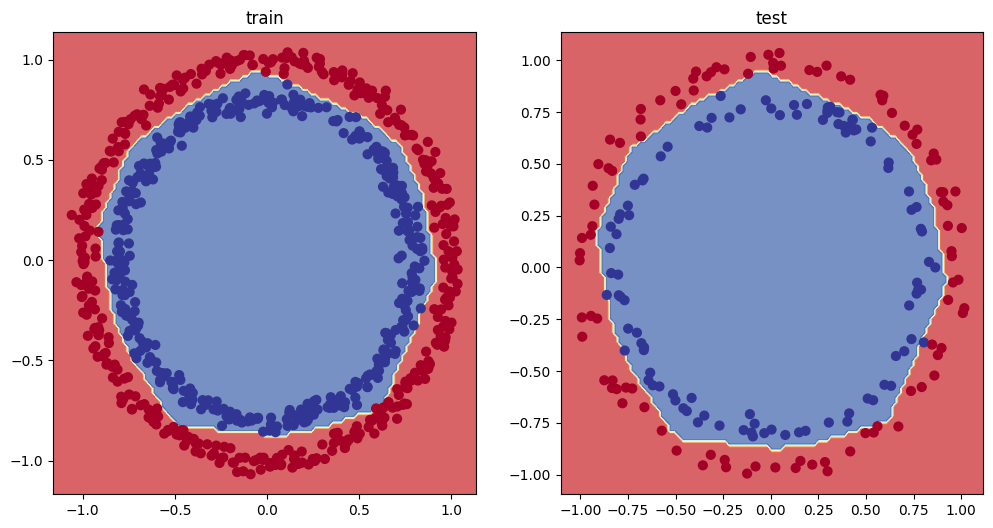

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model3,X_test,y_test)
plt.show()